In [1]:
import pandas as pd 
import numpy as np 


In [30]:
df=pd.read_csv(r'C:\Users\raosa\Desktop\eda\files\Titanic-Dataset.csv')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
print(df.shape)


(891, 12)


In [33]:
input=df[['Pclass','Sex','Age','Fare']]
input.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [34]:
target=df.Survived

In [35]:
dummies=pd.get_dummies(input.Sex)
input=pd.concat([input,dummies],axis=1)
input.head()
input.drop(columns=['Sex'],inplace=True)

In [53]:
#checking null values
print(input.isnull().any())
print(input.isnull().any().sum()) #or 
print(input.isnull().all().sum()) #and 
print(input.isnull().sum().sum()) #adding all 

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool
1
0
177


In [54]:
val=input.Age.mean()
val=int(val)
input.fillna(val,inplace=True)

In [55]:
input.isnull().any().sum()
#eliminated

0

In [56]:
target.isnull().sum() # no null values here 


0

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2)

In [58]:
print("Xtrain Xtest percentage of Xtrain")
print(len(X_train),len(X_test),len(X_train)/(len(X_train)+len(X_test)))
# same for the y datasets

Xtrain Xtest percentage of Xtrain
712 179 0.7991021324354658


In [59]:
from sklearn.naive_bayes import GaussianNB #real life dataset and continous nature features

In [69]:
model=GaussianNB()

In [70]:
model.fit(X_train,y_train)


GaussianNB()

In [71]:
print(model.feature_names_in_)

['Pclass' 'Age' 'Fare' 'female' 'male']


In [83]:
score=model.score(X_test,y_test)
score


0.8100558659217877

In [73]:
y_pred=model.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_pred,y_test)
cm

array([[89, 15],
       [19, 56]], dtype=int64)

Text(0.5, 1.0, '0.8100558659217877')

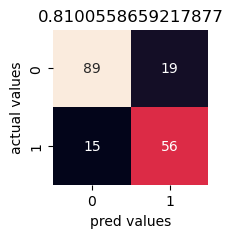

In [94]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(2,4))
sns.heatmap(cm.T,annot=True,fmt='d',square=True,cbar=False)
plt.xlabel('pred values')
plt.ylabel('actual values')
plt.title(score)